# **Properties based Approach**

In [ ]:
!pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 40.9 MB/s eta 0:00:00


OrigSeq                : MQVWPIEGIKKFETLSYLPPLTVEDLLKQIEYLLRSKWVPCLEFSKVGFVYRENHRSPGYYDGRYWTMWKLPMFGCTDATQVLKELEEAKKAYPDAFVRIIGFDNVRQVQLISFIAYKPPGC : OrigSeq
SSE_Predict            : HHEE-EH-EHHEHEH-EH--HEEH-HHHHEHEHHH-HEE-EHHE-HE-EEEHH-HH---EE--HEEEHEHH-HE-EE-HEHEHHHHHHHHHHE--HEEHEE-E--EHHEHHE-EEHEH---E : SSE_Predict


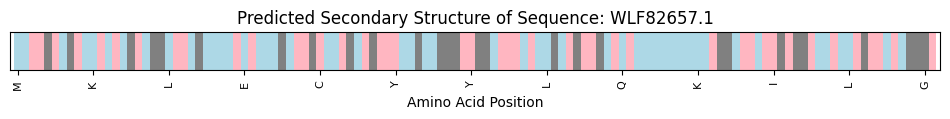

In [ ]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


def sse_prediction(sequence):

    # Helix-forming amino acids
    helix_aas = {'A', 'L', 'E', 'K', 'M', 'Q', 'R', 'H'}
    # Sheet-forming amino acids
    sheet_aas = {'V', 'I', 'Y', 'C', 'W', 'T', 'F'}
    # Coil-forming amino acids
    coil_aas = {'G', 'P', 'S', 'N', 'D'}

    structure = []
    for aa in sequence:
        if aa in helix_aas:
            structure.append('H')
        elif aa in sheet_aas:
            structure.append('E')
        elif aa in coil_aas:
            structure.append('-')
        else:
            structure.append('-')
    return ''.join(structure)

#Read and Process sequence file
def process_fasta_file(file_path):

    for record in SeqIO.parse(file_path, "fasta"):
        protein_sequence = str(record.seq)
        predicted_structure = sse_prediction(protein_sequence)


        print(f"OrigSeq                : {protein_sequence} : OrigSeq")
        print(f"SSE_Predict            : {predicted_structure} : SSE_Predict")

        # Visualization
        visualize_secondary_structure(protein_sequence, predicted_structure, record.id)

#Visualize the secondary structure
def visualize_secondary_structure(protein_sequence, predicted_structure, sequence_id):

    color_map = {
        'H': 'lightblue',  # Helix
        'E': 'lightpink',  # Beta Sheet
        '-': 'grey'        # Coil
    }


    fig, ax = plt.subplots(figsize=(12, 0.5))
    x = np.arange(len(protein_sequence))

    for i, (aa, structure) in enumerate(zip(protein_sequence, predicted_structure)):
        ax.bar(x[i], 1, color=color_map[structure], width=1, align='center')

    ax.set_xlim(-1, len(protein_sequence))
    ax.set_ylim(0, 1)
    ax.set_xticks(x[::10])
    ax.set_xticklabels(protein_sequence[::10], rotation=90, fontsize=8)
    ax.set_yticks([])
    ax.set_xlabel('Amino Acid Position')
    ax.set_title(f'Predicted Secondary Structure of Sequence: {sequence_id}')

    # handles = [plt.Line2D([0], [0], color=color, lw=4, label=label) for label, color in {
    #     'Helix': 'lightblue', 'Sheet': 'lightpink', 'Coil': 'grey'}.items()]
    # ax.legend(handles=handles, loc='upper right')

    plt.tight_layout()
    plt.show()


fasta_file_path = "/content/sequence.fasta"
process_fasta_file(fasta_file_path)


## **Function without Coil**

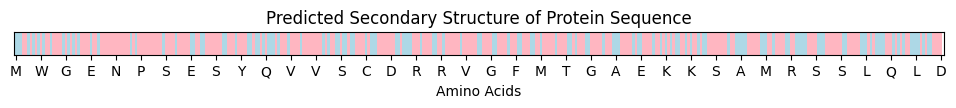

OrigSeq                : MAESQEFADLWERNLISTQEGAPCWEFINDEQYLPSSFDPNIFDNVLNEPPQTSTSPPTASVPVATDYPGEHGFKLGFPQSGTAKSVTCTYSSELNKLFCQLAKTCPVQMVVDVAPPQGSVIRATAIYKKSEHVAEVVRRCPHHERTPDGDGLAPAAHLVRVEGNSRALYREDDTTSRHSVVVPYEAPQVGAEFTTILYNFMCNSSCMGGMNRRPILTIITLETHDGQLLGRRSFEVRVCACPGRDRKTEESNFRKDQETKTLGKAPSANKRSLTKESTSSVPRPEGSKKAKLSGSSDEEMYTLQVRGKERYEMLKKINDSLELSDVVPPSEMDRYRQKLLTKSKKEKDGQAPEPKRGKKLMVKDEKSDSD : OrigSeq
SSE_Predict            : HHHEEHEHEHEHEEHEEEEHEHEHEHEEEEHEEHEEEEEEEEEEEEHEHEEEEEEEEEEHEEEEHEEEEEHHEEHHEEEEEEEHHEEEHEEEEHHEHHEHEHHHEHEEEHEEEEHEEEEEEEEHEHEEHHEHHEHHEEEEHEHHHEEEEEEEHHEHHHHEEEHEEEEHHEEHEEEEEEHEEEEEEHHEEEEHHEEEEHEEEHHEEEHHEEHEEEEEHEEEEHHEHEEEHHEEEEEHEEEHHHEEEEEHEHHEEEEHEEHEHEHEHHEEHEHEEHEHHEEEEEEEEHEEHHHHHEEEEEHHHEEHEEEEHHEEHHHHHEEEEHHHEEEEEEEHHEEEEEHHHEHEHHHHEEEHEHEHEEHHHHEHEHHEEEE :


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

aa_properties = {
    'A': 'H',  # Alanine: Helix
    'R': 'E',  # Arginine: Beta Sheet
    'N': 'E',  # Asparagine: Beta Sheet
    'D': 'E',  # Aspartic acid: Beta Sheet
    'C': 'H',  # Cysteine: Helix
    'Q': 'E',  # Glutamine: Beta Sheet
    'E': 'H',  # Glutamic acid: Helix
    'G': 'E',  # Glycine: Beta Sheet
    'H': 'H',  # Histidine: Helix
    'I': 'E',  # Isoleucine: Helix
    'L': 'H',  # Leucine: Helix
    'K': 'H',  # Lysine: Helix
    'M': 'H',  # Methionine: Helix
    'F': 'E',  # Phenylalanine: Beta Sheet
    'P': 'E',  # Proline: Beta Sheet
    'S': 'E',  # Serine: Beta Sheet
    'T': 'E',  # Threonine: Beta Sheet
    'W': 'E',  # Tryptophan: Helix
    'Y': 'E',  # Tyrosine: Beta Sheet
    'V': 'E',   # Valine: Beta Sheet
}



def read_fasta(file_path):
    with open(file_path, 'r') as file:
        next(file)

        sequence = "".join(line.strip() for line in file)
    return sequence


fasta_file_path = 'sequence.fasta'

# Reading sequence from the FASTA file
protein_sequence = read_fasta(fasta_file_path)


def predict_secondary_structure(protein_sequence):
    seq = ""
    for aa in protein_sequence:
        if aa in aa_properties:
            seq += aa_properties[aa]
        else:
            seq += '-'
    return seq

# Calling function
predicted_structure = predict_secondary_structure(protein_sequence)


color_map = {
    'H': 'lightblue',  # Helix: Blue
    'E': 'lightpink',  # Beta Sheet: Green
    '-': 'grey'   # Coil/Unclassified: Grey
}

# Plotting the sequence and its secondary structure
fig, ax = plt.subplots(figsize=(12, 0.3))
x = np.arange(len(protein_sequence))
y = [0] * len(protein_sequence)

# Plotting each amino acid
for i, aa in enumerate(predicted_structure):
    ax.bar(x[i], 1, color=color_map[aa], width=1, align='center')

# Setting plot
ax.set_xlim(-1, len(protein_sequence))
ax.set_ylim(0, 1)
ax.set_xticks(x[::10])
ax.set_xticklabels(protein_sequence[::10])
ax.set_yticks([])
ax.set_xlabel('Amino Acids')
ax.set_title('Predicted Secondary Structure of Protein Sequence')

plt.show()

print(f"OrigSeq                : {protein_sequence} : OrigSeq")
print(f"SSE_Predict            : {predicted_structure} :")

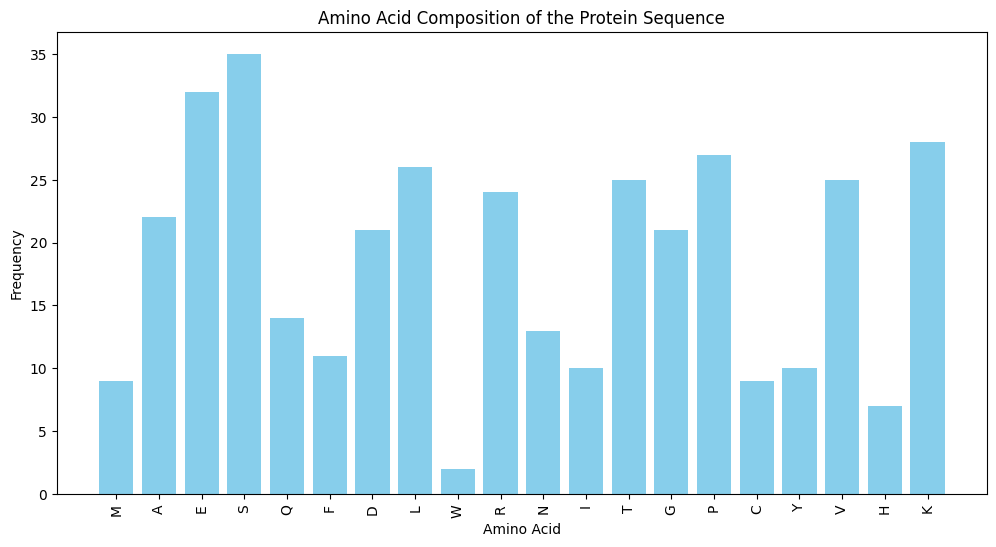

In [ ]:
from collections import Counter
# Amino Acid Composition Plot
aa_counts = Counter(protein_sequence)  # Count the occurrence of each amino acid
aa_labels = list(aa_counts.keys())  # Amino acid types
aa_frequencies = list(aa_counts.values())  # Corresponding frequencies

# Plotting the amino acid composition
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(aa_labels, aa_frequencies, color='skyblue')
ax.set_xlabel('Amino Acid')
ax.set_ylabel('Frequency')
ax.set_title('Amino Acid Composition of the Protein Sequence')
plt.xticks(rotation=90)  # Rotate labels for better visibility
plt.show()

# **API Based Approach**

## **PSIPRED**

In [ ]:
import os
import requests
import json
import time

uri = 'http://bioinf.cs.ucl.ac.uk/psipred/api/submission'

payload = {'input_data': ('prot.txt', open('sequence.fasta', 'rb'))}
data = {'job': 'psipred',
        'submission_name': 'test',
        'email': 'sheraxahmad139@gmail.com',
        }
print("Sending Request")
r = requests.post(uri+".json", data=data, files=payload)
response_data = json.loads(r.text)
print(response_data)

while True:
    print("Polling result for:"+response_data['UUID'])
    result_uri = uri+"/"+response_data['UUID']
    r = requests.get(result_uri, headers={"Accept":"application/json"})
    result_data = json.loads(r.text)
    if "Complete" in result_data["state"]:
        print(r.text)
        break
    else:
        time.sleep(30)

## **Predictprotein**

In [ ]:
import requests

def get_secondary_structure(sequence):
    """
    Retrieve secondary structure predictions for a given protein sequence using PredictProtein API.

    :param sequence: Protein sequence in plain text format
    :return: Secondary structure predictions or error message
    """
    url = "https://predictprotein.org/api/ppc_fetch"
    params = {
        "action": "get",         # Fetch the computed results
        "sequence": sequence,    # Input sequence in plain text
        "method": "reprof"       # Secondary structure prediction method
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Raise HTTPError for bad responses
        if "zip" in response.headers.get("Content-Type", ""):
            # The result is a zip file containing the predictions
            with open("secondary_structure.zip", "wb") as file:
                file.write(response.content)
            print("Secondary structure predictions downloaded as 'secondary_structure.zip'.")
        else:
            print(response.json())  # Fallback to JSON response
    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")

# Example protein sequence
protein_sequence = (
    "MAAGSGVVPPPLGAGLCTVKVEEDSPGNQESSGSGDWQNPETSRKQFRQLRYQEVAGPEEALSRLWELCRRWLRPELL"
    "SKEQIMELLVLEQFLTILPQELQAYVRDHSPESGEEAAALARTLQRALDRASPQGFMTFKDVAESLTWEEWEQLAAAR"
    "KGFCEESTKDAGSTVVPGLETRTVNTDVILKQEILKEAEPQAWLQEVSQGMVPALTKCGDPSEDWEEKLPKAAVLLQL"
    "QGSEEQGRTAIPLLIGVSREERDSKNNESENSGSSVLGQHIQTAEGLGTNSQCGDDHKQGFHVKCHSVKPHSSVDSAV"
    "GLLETQRQFQEDKPYKCDSCEKGFRQRSDLFKHQRIHTGEKPYQCQECGKRFSQSAALVKHQRTHTGEKPYACPECG"
    "ECFRQSSHLSRHQRTHASEKYYKCEECGEIVHVSSLFRHQRLHRGERPYKCGDCEKSFRQRSDLFKHQRTHTGEKPY"
)

# Fetch secondary structure predictions
get_secondary_structure(protein_sequence)


Error: 403 Client Error: Forbidden for url: https://predictprotein.org/api/ppc_fetch?action=get&sequence=MAAGSGVVPPPLGAGLCTVKVEEDSPGNQESSGSGDWQNPETSRKQFRQLRYQEVAGPEEALSRLWELCRRWLRPELLSKEQIMELLVLEQFLTILPQELQAYVRDHSPESGEEAAALARTLQRALDRASPQGFMTFKDVAESLTWEEWEQLAAARKGFCEESTKDAGSTVVPGLETRTVNTDVILKQEILKEAEPQAWLQEVSQGMVPALTKCGDPSEDWEEKLPKAAVLLQLQGSEEQGRTAIPLLIGVSREERDSKNNESENSGSSVLGQHIQTAEGLGTNSQCGDDHKQGFHVKCHSVKPHSSVDSAVGLLETQRQFQEDKPYKCDSCEKGFRQRSDLFKHQRIHTGEKPYQCQECGKRFSQSAALVKHQRTHTGEKPYACPECGECFRQSSHLSRHQRTHASEKYYKCEECGEIVHVSSLFRHQRLHRGERPYKCGDCEKSFRQRSDLFKHQRTHTGEKPY&method=reprof


## **JPRED**

In [ ]:
import requests
import time

# Step 1: Submit the Job

def submit_job(fasta_file_path, email):
    # Define the URL for the JPred API to submit the job
    url = 'https://www.jpred.org/api/submit_job'

    # Open the FASTA file
    with open(fasta_file_path, 'rb') as fasta_file:
        # Prepare the data and files to send in the request
        files = {'sequence': fasta_file}
        data = {'email': email}

        # Send the request
        response = requests.post(url, files=files, data=data)

        # Check if the job was successfully submitted
        if response.status_code == 200:
            print("Job submitted successfully!")
            job_id = response.text.strip()  # Get the job ID from the response
            print(f"Job ID: {job_id}")
            return job_id
        else:
            print("Error submitting job:", response.status_code)
            return None


# Step 2: Check Job Status

def check_job_status(job_id):
    # Define the URL for checking the job status
    status_url = 'https://www.jpred.org/api/job_status'

    while True:
        # Make a GET request to check the job status
        response = requests.get(status_url, params={'jobid': job_id})

        if response.status_code == 200:
            status_data = response.json()  # Assuming the response is in JSON format
            status = status_data.get('status')

            # Check if the job is completed
            if status == 'done':
                print("Job completed successfully!")
                return status_data.get('result_url')  # URL to download the results
            elif status == 'in_progress':
                print("Job is still in progress. Checking again in 60 seconds...")
                time.sleep(60)  # Wait 60 seconds before checking again
            else:
                print(f"Job status: {status}")
                break
        else:
            print("Error checking job status:", response.status_code)
            break

    return None


# Step 3: Main Function

def main():
    # Path to your FASTA file and your email address
    fasta_file_path = 'sequence.fasta'
    email = 'sheraxahmah139@gmail.com'

    # Submit the job
    job_id = submit_job(fasta_file_path, email)

    if job_id:
        # Check the status of the job
        result_url = check_job_status(job_id)

        if result_url:
            print(f"Download your results here: {result_url}")
        else:
            print("Job failed or there was an issue retrieving results.")
    else:
        print("Job submission failed.")

# Run the main function
if __name__ == "__main__":
    main()


Error submitting job: 502
Job submission failed.


# ***With Neural Nets***

### **Importing Training dataset**

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/prot-seq-filtered.csv")
data.head()

,pdb_id,chain_code,seq,sst8,sst3,len
0,1BXL,B,GQVGRQLAIIGDDINR,CCTTHHHHHHHHHTCC,CCCCHHHHHHHHHCCC,16
1,1D9K,P,GNSHRGAIEWEGIESG,CCEECCCCCCCCCCCC,CCEECCCCCCCCCCCC,16
2,1DPU,B,RIQRNKAAALLRLAAR,CCSSHHHHHHHHHHCC,CCCCHHHHHHHHHHCC,16
3,1DXP,C,KGSVVIVGRIILSGRK,CCCBEEEEEEEECCCC,CCCEEEEEEEEECCCC,16
4,1EJH,E,KQYDREFLLDFQFMPA,CCCCHHHHHTTSCCCC,CCCCHHHHHCCCCCCC,16


### **Building Neural net**

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


764/764 ━━━━━━━━━━━━━━━━━━━━ 85s 104ms/step - accuracy: 0.7408 - loss: 0.5677 - val_accuracy: 0.8120 - val_loss: 0.4341
Epoch 2/20
764/764 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.8108 - loss: 0.4409 - val_accuracy: 0.8228 - val_loss: 0.4108
Epoch 3/20
764/764 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - accuracy: 0.8214 - loss: 0.4192 - val_accuracy: 0.8278 - val_loss: 0.4017
Epoch 4/20
764/764 ━━━━━━━━━━━━━━━━━━━━ 79s 102ms/step - accuracy: 0.8280 - loss: 0.4054 - val_accuracy: 0.8338 - val_loss: 0.3890
Epoch 5/20
764/764 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.8325 - loss: 0.3966 - val_accuracy: 0.8385 - val_loss: 0.3793
Epoch 6/20
764/764 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.8379 - loss: 0.3846 - val_accuracy: 0.8430 - val_loss: 0.3708
Epoch 7/20
764/764 ━━━━━━━━━━━━━━━━━━━━ 83s 103ms/step - accuracy: 0.8402 - loss: 0.3799 - val_accuracy: 0.8435 - val_loss: 0.3687
Epoch 8/20
764/764 ━━━━━━━━━━━━━━━━━━━━ 83s 104ms/step - accuracy: 0.8442 - loss: 0.3719 - val

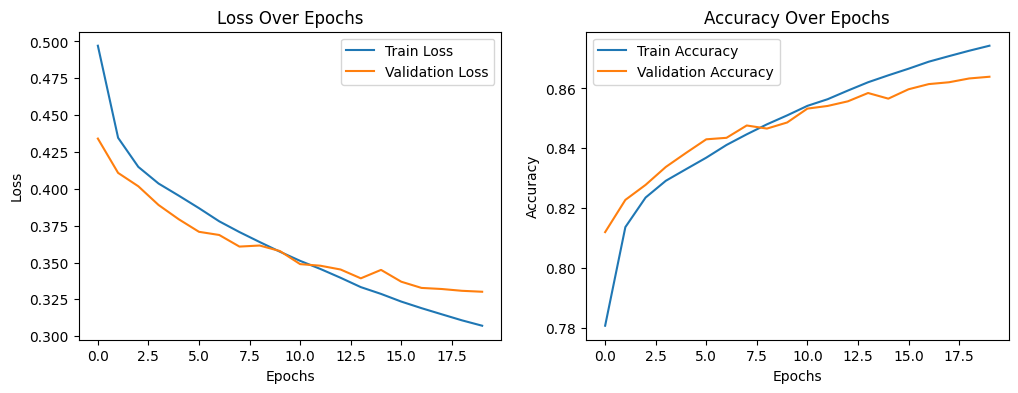

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

data = pd.read_csv("/content/prot-seq-filtered.csv")

# Encoding
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
aa_to_index = {aa: idx + 1 for idx, aa in enumerate(amino_acids)}

def encode_sequence(seq):
    return [aa_to_index.get(aa, 0) for aa in seq]

data['encoded_seq'] = data['seq'].apply(encode_sequence)

# Encoding sst3 labels as categories
def encode_sst3(sst3):
    mapping = {'H': 0, 'E': 1, 'C': 2}  # Helix: H, Sheet: E, Coil: C
    return [mapping[s] for s in sst3]

data['sst3_encoded'] = data['sst3'].apply(encode_sst3)


X = data['encoded_seq'].tolist()
y = data['sst3_encoded'].tolist()

# Padding sequences
max_seq_length = max(data['seq'].apply(len))
X_padded = pad_sequences(X, maxlen=max_seq_length, padding='post')
y_padded = pad_sequences(y, maxlen=max_seq_length, padding='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_padded, test_size=0.2, random_state=42)

# Model architecture
embedding_dim = 32
num_classes = 3

def build_model():
    model = Sequential([
        Embedding(input_dim=len(amino_acids) + 1, output_dim=embedding_dim, input_length=max_seq_length),
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # 3 classes: H, E, C
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


model = build_model()

# Training the model
callbacks = [EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=16,
    callbacks=callbacks
)

# Evaluating the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# plotting the training
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training_history(history)


### **Getting Prediction**

In [ ]:
def predict_secondary_structure(fasta_file, model, max_seq_length):
    fasta_file = '/content/sequence.fasta'
    with open(fasta_file, 'r') as file:
        lines = file.readlines()

    sequence = ''.join(line.strip() for line in lines[1:])

    # Encoding the sequence
    encoded_sequence = encode_sequence(sequence)

    # Padding the sequence
    padded_sequence = pad_sequences([encoded_sequence], maxlen=max_seq_length, padding='post')

    # predictions
    predictions = model.predict(padded_sequence)[0]
    predicted_labels = np.argmax(predictions, axis=1)

    # Decoding labels
    index_to_sst3 = {0: 'H', 1: 'E', 2: 'C'}
    predicted_sst3 = ''.join(index_to_sst3[label] for label in predicted_labels)


    print(sequence)
    print(predicted_sst3)

predict_secondary_structure('example.fasta', model, max_seq_length)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
MAESQEFADLWERNLISTQEGAPCWEFINDEQYLPSSFDPNIFDNVLNEPPQTSTSPPTASVPVATDYPGEHGFKLGFPQSGTAKSVTCTYSSELNKLFC
CCCCHHHHHHHHHHHHHCCCCCCCCCCCCCCCCCCCCCCCCHHHHHHCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHCHEE


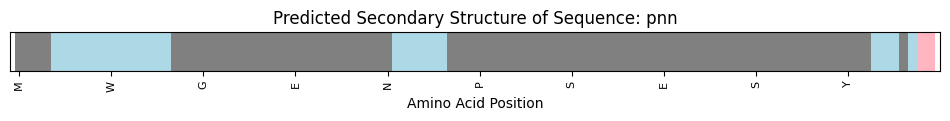

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_secondary_structure(protein_sequence, predicted_structure, sequence_id):
    """
    Visualizes the secondary structure prediction using a bar plot.
    """
    # Define the color map with proper handling for 'H', 'E', and 'C'
    color_map = {
        'H': 'lightblue',  # Helix
        'E': 'lightpink',  # Beta Sheet
        'C': 'grey'        # Coil
    }

    # Check if the predicted structure contains only allowed characters
    for structure in predicted_structure:
        if structure not in color_map:
            raise ValueError(f"Unexpected structure character: {structure}. Expected 'H', 'E', or 'C'.")

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 0.5))
    x = np.arange(len(protein_sequence))

    # Plot each amino acid with the corresponding secondary structure color
    for i, (aa, structure) in enumerate(zip(protein_sequence, predicted_structure)):
        ax.bar(x[i], 1, color=color_map[structure], width=1, align='center')

    # Customize the plot
    ax.set_xlim(-1, len(protein_sequence))
    ax.set_ylim(0, 1)
    ax.set_xticks(x[::10])
    ax.set_xticklabels(protein_sequence[::10], rotation=90, fontsize=8)
    ax.set_yticks([])
    ax.set_xlabel('Amino Acid Position')
    ax.set_title(f'Predicted Secondary Structure of Sequence: {sequence_id}')

    # # Add legend
    # handles = [plt.Line2D([0], [0], color=color, lw=4, label=label) for label, color in {
    #     'Helix': 'lightblue', 'Sheet': 'lightpink', 'Coil': 'grey'}.items()]
    # ax.legend(handles=handles, loc='upper right')

    plt.tight_layout()
    plt.show()

# Example usage
protein_sequence = 'MAESQEFADLWERNLISTQEGAPCWEFINDEQYLPSSFDPNIFDNVLNEPPQTSTSPPTASVPVATDYPGEHGFKLGFPQSGTAKSVTCTYSSELNKLFC'
predicted_structure = 'CCCCHHHHHHHHHHHHHCCCCCCCCCCCCCCCCCCCCCCCCHHHHHHCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHCHEE'
sequence_id = 'pnn'

# Call the function to visualize the secondary structure
visualize_secondary_structure(protein_sequence, predicted_structure, sequence_id)
